In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/black-friday-sales-eda/train.csv


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/kaggle/input/black-friday-sales-eda/train.csv')

In [6]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
df.shape

(550068, 12)

In [8]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
Purchase                      0
dtype: int64

In [14]:
df['Stay_In_Current_City_Years'] = df['Stay_In_Current_City_Years'].replace('4+', '4')

In [15]:
df.Age.unique()

array(['0-17', '46-50', '26-35', '51-55', '36-45', '18-25', '55+'],
      dtype=object)

In [16]:
df.Occupation.unique()

array([10,  7, 20,  9,  1, 12, 17,  0,  3, 15,  4, 11,  8, 16, 19,  2, 14,
       13,  6,  5, 18])

In [17]:
df.City_Category.unique()

array(['A', 'B', 'C'], dtype=object)

In [18]:
df.Marital_Status.unique()

array([0, 1])

In [19]:
df.Product_ID.unique()

array(['P00248942', 'P00184942', 'P00145042', 'P00231342', 'P0096642',
       'P00036842', 'P00249542', 'P00303442', 'P00078742', 'P00085942',
       'P00182642', 'P00155442', 'P00221342', 'P00111142', 'P0094542',
       'P00148642', 'P00113242', 'P00110842', 'P00182342', 'P00042142',
       'P00244242', 'P00019342', 'P00073842', 'P00190742', 'P00151842',
       'P00112642', 'P00034442', 'P00222242', 'P00118342', 'P00324742',
       'P00190042', 'P00158542', 'P00112542', 'P00127842', 'P00125942',
       'P00058142', 'P00251642', 'P00351142', 'P00262242', 'P00225842',
       'P00278942', 'P00177442', 'P00000642', 'P00288942', 'P00270942',
       'P00345842', 'P00032042', 'P00031842', 'P00206442', 'P00046742',
       'P00289342', 'P00281742', 'P00266642', 'P00026042', 'P00216342',
       'P00102642', 'P00127442', 'P00345642', 'P00115342', 'P00037142',
       'P00192042', 'P00086442', 'P00028442', 'P00277442', 'P00085242',
       'P00142142', 'P00030942', 'P00112142', 'P00273442', 'P00321

In [20]:
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
13,1000005,P00145042,M,26-35,20,A,1,1,1,2.0,5.0,15665
14,1000006,P00231342,F,51-55,9,A,1,0,5,8.0,14.0,5378
16,1000006,P0096642,F,51-55,9,A,1,0,2,3.0,4.0,13055
...,...,...,...,...,...,...,...,...,...,...,...,...
545902,1006039,P00064042,F,46-50,0,B,4,1,3,4.0,12.0,8047
545904,1006040,P00081142,M,26-35,6,B,2,0,6,8.0,14.0,16493
545907,1006040,P00277642,M,26-35,6,B,2,0,2,3.0,10.0,3425
545908,1006040,P00127642,M,26-35,6,B,2,0,1,2.0,15.0,15694


In [25]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

In [28]:
df["Stay_In_Current_City_Years"]=df["Stay_In_Current_City_Years"].astype(int)

<Axes: xlabel='Age', ylabel='count'>

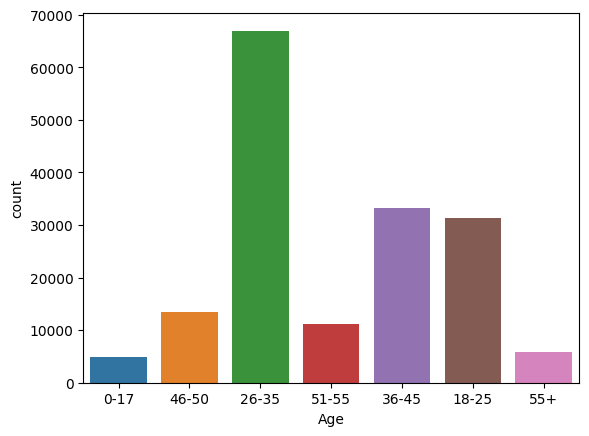

In [29]:
sns.countplot(data=df,x='Age')

<Axes: xlabel='Gender', ylabel='count'>

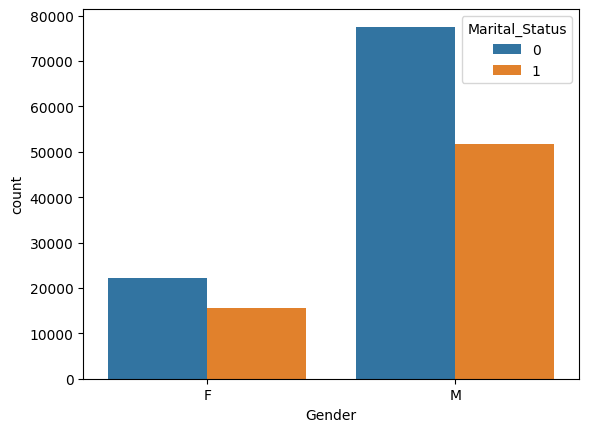

In [30]:
sns.countplot(data=df,x='Gender',hue='Marital_Status')

<Axes: xlabel='Product_Category_1', ylabel='count'>

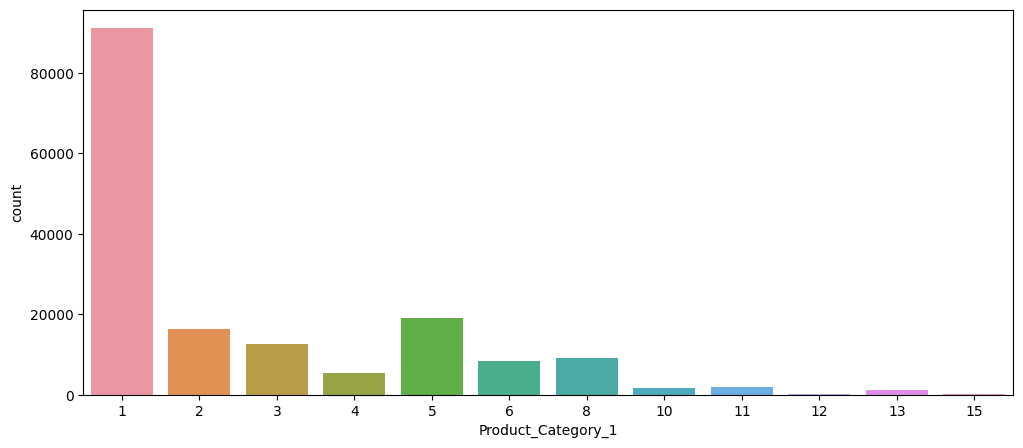

In [31]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category_1')

<Axes: xlabel='Product_Category_3', ylabel='count'>

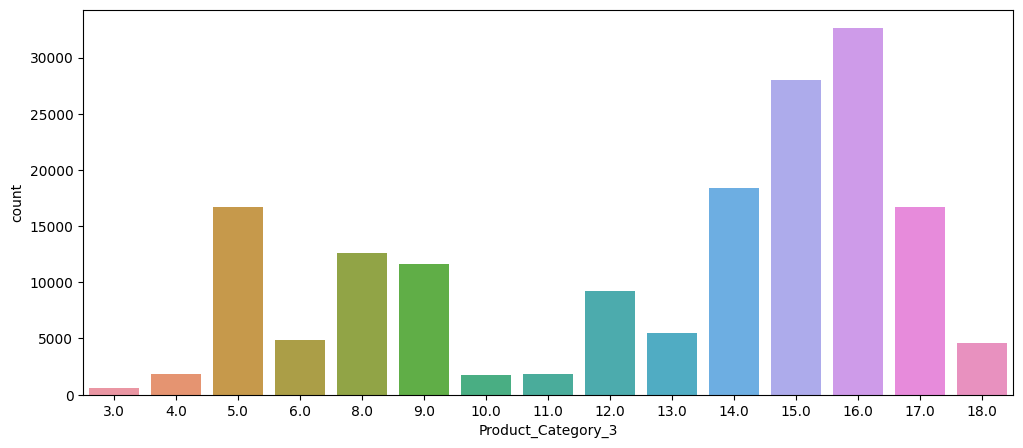

In [32]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category_3')

<Axes: xlabel='Product_Category_2', ylabel='count'>

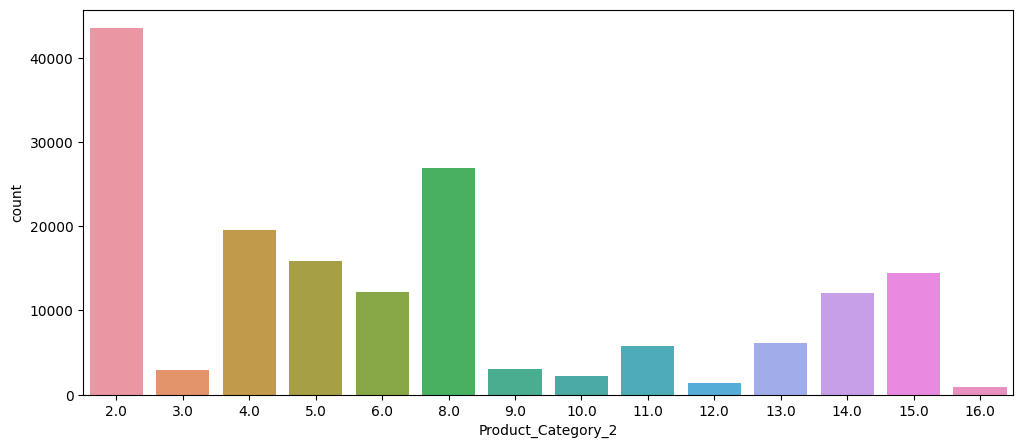

In [33]:
plt.figure(figsize=(12,5))
sns.countplot(data=df,x='Product_Category_2')

product category  3 gives us other picture compared to other 2 product categories 

1st and 2nd product category are in align whereas the third is not 


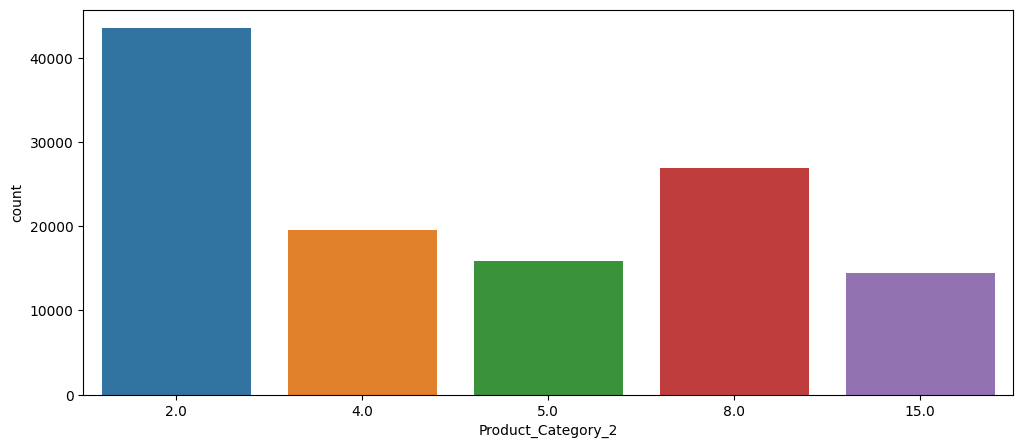

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_values = df['Product_Category_2'].value_counts().nlargest(5).index


df_top_5 = df[df['Product_Category_2'].isin(top_5_values)]


plt.figure(figsize=(12,5))
sns.countplot(data=df_top_5, x='Product_Category_2')


plt.show()

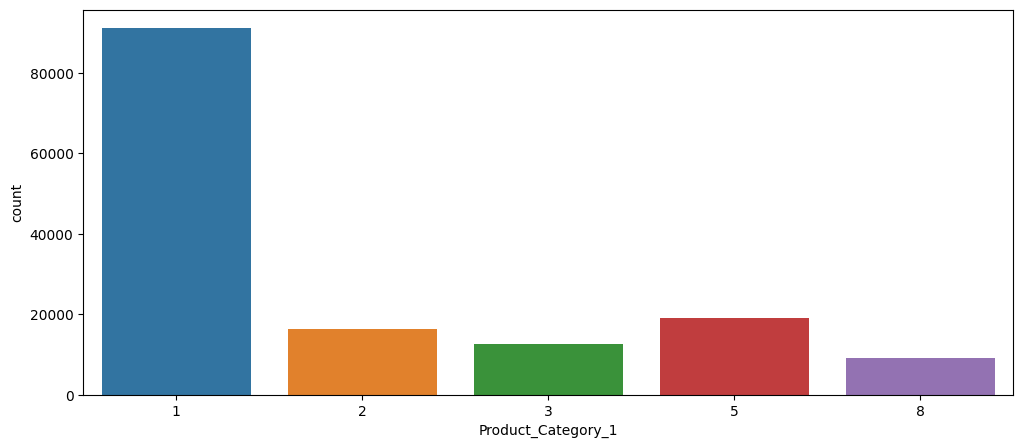

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_values = df['Product_Category_1'].value_counts().nlargest(5).index


df_top_5 = df[df['Product_Category_1'].isin(top_5_values)]


plt.figure(figsize=(12,5))
sns.countplot(data=df_top_5, x='Product_Category_1')


plt.show()

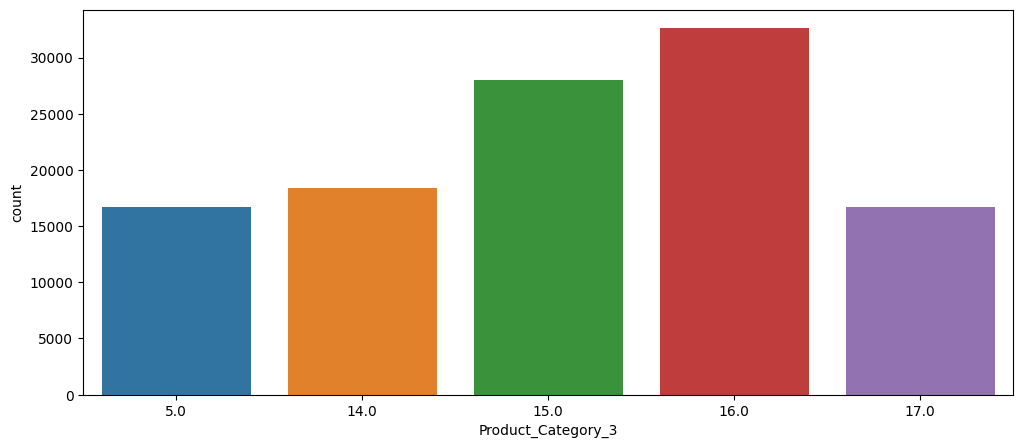

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

top_5_values = df['Product_Category_3'].value_counts().nlargest(5).index


df_top_5 = df[df['Product_Category_3'].isin(top_5_values)]


plt.figure(figsize=(12,5))
sns.countplot(data=df_top_5, x='Product_Category_3')


plt.show()

In [ ]:
highest product categories to sell 

highest product categories to sell  are 2 , 5 ,8 as they both show high occurene even if they are atleast one of the product category

<Axes: xlabel='Age', ylabel='Purchase'>

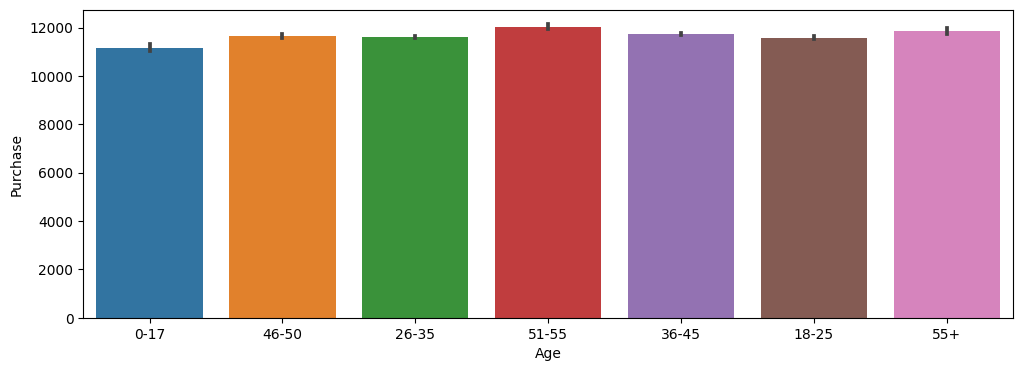

In [39]:
plt.figure(figsize=(12,4))
sns.barplot(data=df,x='Age',y='Purchase')

all groups have same purchasing power

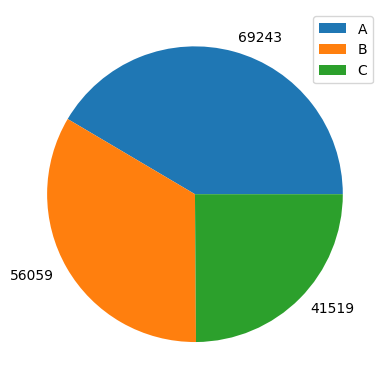

In [40]:
plt.pie(df['City_Category'].value_counts(),labels=df['City_Category'].value_counts().values,)
plt.legend(['A','B','C'])
plt.show()

city a has highest customer 

<Axes: xlabel='Purchase', ylabel='count'>

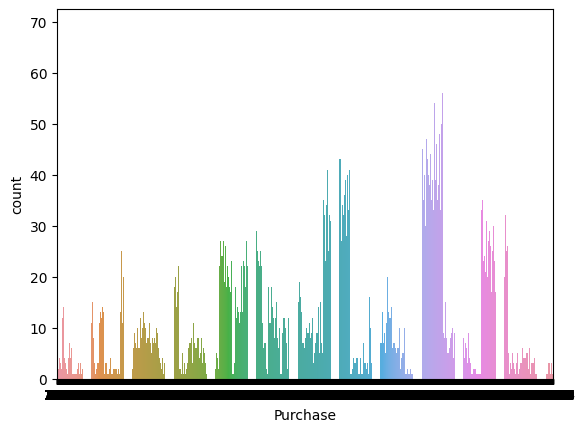

In [41]:
sns.countplot(x='Purchase', data=df)

In [49]:

df = df.drop(columns=['User_ID', 'Product_ID'])


print(df.head())

   Gender    Age  Occupation City_Category  Stay_In_Current_City_Years  \
1       F   0-17          10             A                           2   
6       M  46-50           7             B                           2   
13      M  26-35          20             A                           1   
14      F  51-55           9             A                           1   
16      F  51-55           9             A                           1   

    Marital_Status  Product_Category_1  Product_Category_2  \
1                0                   1                 6.0   
6                1                   1                 8.0   
13               1                   1                 2.0   
14               0                   5                 8.0   
16               0                   2                 3.0   

    Product_Category_3  Purchase  
1                 14.0     15200  
6                 17.0     19215  
13                 5.0     15665  
14                14.0      5378  
16     

<Figure size 3600x3000 with 0 Axes>

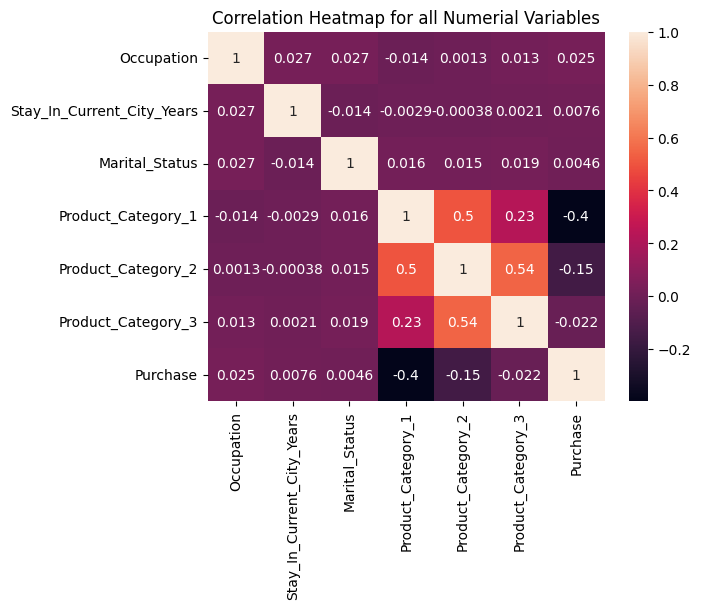

<Figure size 3600x3000 with 0 Axes>

In [50]:
num_df = df.select_dtypes(include=['number']) 
sns.heatmap(num_df.corr(), annot=True)
plt.title("Correlation Heatmap for all Numerial Variables")
plt.figure(figsize=(36,30))

array([[<Axes: title={'center': 'Occupation'}>,
        <Axes: title={'center': 'Stay_In_Current_City_Years'}>,
        <Axes: title={'center': 'Marital_Status'}>],
       [<Axes: title={'center': 'Product_Category_1'}>,
        <Axes: title={'center': 'Product_Category_2'}>,
        <Axes: title={'center': 'Product_Category_3'}>],
       [<Axes: title={'center': 'Purchase'}>, <Axes: >, <Axes: >]],
      dtype=object)

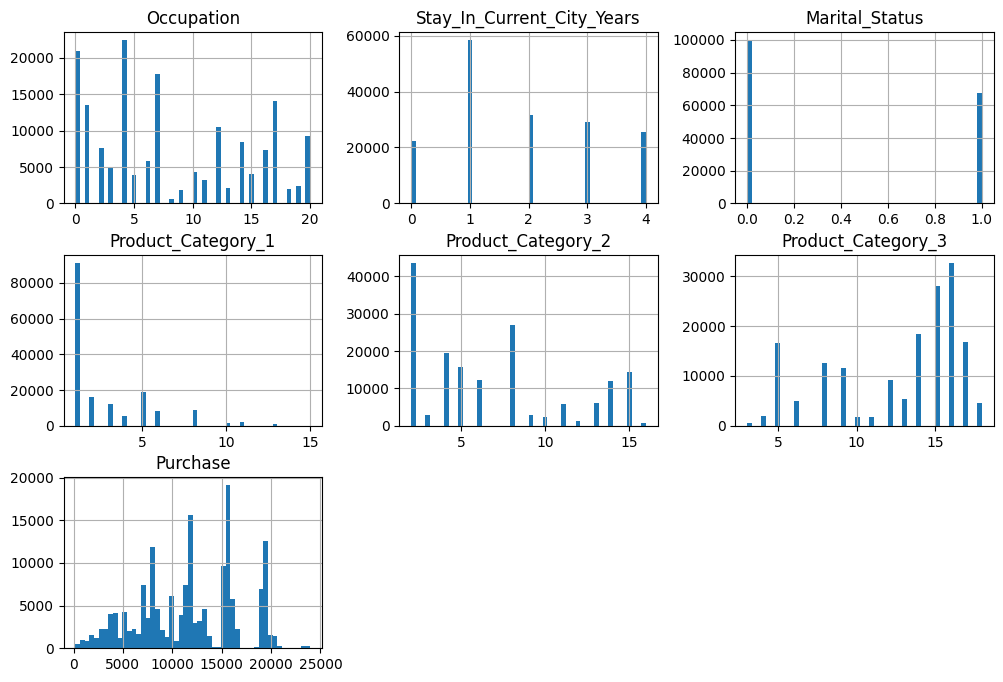

In [53]:
df.hist(bins=50, figsize=(12, 8))